In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pyarrow

data_path ='../../../Data/eumetnet'

In [2]:
fcs = xr.open_dataarray(f'{data_path}/ESSD_benchmark/ESSD_benchmark_training_data_forecasts.nc')
obs = xr.open_dataarray(f'{data_path}/ESSD_benchmark/ESSD_benchmark_training_data_observations.nc')

In [3]:
fcs

<xarray.DataArray 't2m' (station_id: 229, time: 209, year: 20, step: 21,
                         number: 11)>
[221117820 values with dtype=float32]
Coordinates: (12/14)
  * year                (year) int64 1 2 3 4 5 6 7 8 ... 13 14 15 16 17 18 19 20
  * time                (time) datetime64[ns] 2017-01-02 ... 2018-12-31
    model_altitude      (station_id) float32 ...
    model_land_usage    (station_id) int8 ...
    model_latitude      (station_id) float64 ...
    model_longitude     (station_id) float64 ...
    ...                  ...
  * station_id          (station_id) int64 6472 6479 6400 ... 5839 5871 5906
    station_land_usage  (station_id) int8 ...
    station_latitude    (station_id) float64 ...
    station_longitude   (station_id) float64 ...
    station_name        (station_id) object ...
  * step                (step) timedelta64[ns] 0 days 00:00:00 ... 5 days 00:...
Attributes:
    GRIB_NV:                                  0
    GRIB_Nx:                                  93
    GRIB_Ny:                                  125
    GRIB_cfName:                              unknown
    GRIB_cfVarName:                           t2m
    GRIB_gridDefinitionDescription:           Latitude/Longitude Grid
    GRIB_gridType:                            regular_ll
    GRIB_iDirectionIncrementInDegrees:        0.25
    GRIB_iScansNegatively:                    0
    GRIB_jDirectionIncrementInDegrees:        0.25
    GRIB_jPointsAreConsecutive:               0
    GRIB_jScansPositively:                    0
    GRIB_latitudeOfFirstGridPointInDegrees:   67.0
    GRIB_latitudeOfLastGridPointInDegrees:    36.0
    GRIB_longitudeOfFirstGridPointInDegrees:  -6.0
    GRIB_longitudeOfLastGridPointInDegrees:   17.0
    GRIB_missingValue:                        9999
    GRIB_name:                                2 metre temperature
    GRIB_numberOfPoints:                      11625
    GRIB_paramId:                             167
    GRIB_shortName:                           2t
    GRIB_stepType:                            instant
    GRIB_stepUnits:                           1
    GRIB_totalNumber:                         11
    GRIB_typeOfLevel:                         surface
    GRIB_units:                               K
    coordinates:                              number time step surface latitu...
    long_name:                                2 metre temperature
    standard_name:                            unknown
    units:                                    K
    model altitude source:                    European Union, Copernicus Land...
    land usage source:                        European Union, Copernicus Land...
    land usage legend:                        {1: {'label': '111 - Continuous...

In [4]:
fcs.coords

Coordinates:
  * year                (year) int64 1 2 3 4 5 6 7 8 ... 13 14 15 16 17 18 19 20
  * time                (time) datetime64[ns] 2017-01-02 ... 2018-12-31
    model_altitude      (station_id) float32 301.5 40.65 -1.725 ... 383.4 103.0
    model_land_usage    (station_id) int8 23 20 20 25 21 20 ... 2 24 23 18 23 3
    model_latitude      (station_id) float64 50.25 51.25 51.0 ... 53.5 50.0 49.5
    model_longitude     (station_id) float64 5.25 5.5 2.75 6.0 ... 7.25 7.25 8.5
  * number              (number) int64 0 1 2 3 4 5 6 7 8 9 10
    station_altitude    (station_id) float64 295.3 55.2 4.7 ... -0.27 497.0 98.0
  * station_id          (station_id) int64 6472 6479 6400 ... 5839 5871 5906
    station_land_usage  (station_id) int8 12 6 6 36 20 12 11 ... 6 24 15 18 6 12
    station_latitude    (station_id) float64 50.19 51.17 51.09 ... 49.95 49.51
    station_longitude   (station_id) float64 5.255 5.463 2.652 ... 7.264 8.559
    station_name        (station_id) object 'Humain' 

In [5]:
# if not yet dropped: drop data that overlaps with test period
# fcs_test_times = fcs.time.sel(time = slice('2018', '2019'))
# fcs = xr.where((fcs.year == 20) & (fcs.time.isin(fcs_test_times)), np.nan, fcs)

array([    0, 52899])

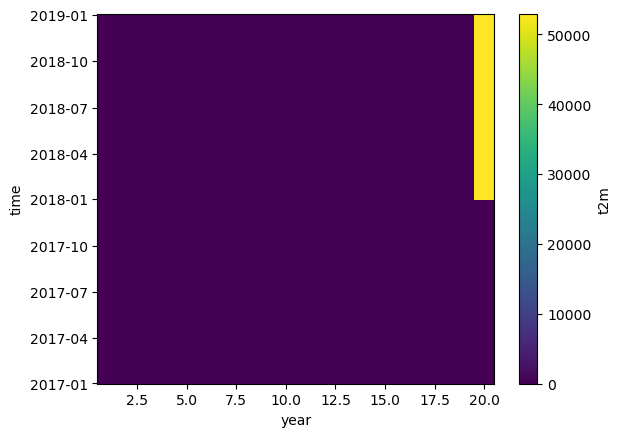

In [6]:
fcs.isnull().sum(('station_id','step','number')).plot()
np.unique(fcs.isnull().sum(('station_id','step','number')))
# there are no missing values except for the test dates that were dropped

In [7]:
# takes a few minutes
df_fcs = fcs.to_dataframe(name = 't2m').reset_index()

In [8]:
df_fcs = df_fcs.dropna(axis = 0)
df_fcs

,station_id,time,year,step,number,model_altitude,model_land_usage,model_latitude,model_longitude,station_altitude,station_land_usage,station_latitude,station_longitude,station_name,t2m
0,6472,2017-01-02,1,0 days,0,301.532471,23,50.25,5.25,295.3,12,50.193663,5.255236,Humain,259.395844
1,6472,2017-01-02,1,0 days,1,301.532471,23,50.25,5.25,295.3,12,50.193663,5.255236,Humain,259.306458
2,6472,2017-01-02,1,0 days,2,301.532471,23,50.25,5.25,295.3,12,50.193663,5.255236,Humain,259.483154
3,6472,2017-01-02,1,0 days,3,301.532471,23,50.25,5.25,295.3,12,50.193663,5.255236,Humain,258.983124
4,6472,2017-01-02,1,0 days,4,301.532471,23,50.25,5.25,295.3,12,50.193663,5.255236,Humain,259.802429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221117584,5906,2018-12-31,19,5 days,6,102.959984,3,49.50,8.50,98.0,12,49.506200,8.558500,Mannheim,275.802795
221117585,5906,2018-12-31,19,5 days,7,102.959984,3,49.50,8.50,98.0,12,49.506200,8.558500,Mannheim,273.959442
221117586,5906,2018-12-31,19,5 days,8,102.959984,3,49.50,8.50,98.0,12,49.506200,8.558500,Mannheim,274.435303
221117587,5906,2018-12-31,19,5 days,9,102.959984,3,49.50,8.50,98.0,12,49.506200,8.558500,Mannheim,273.288116


### obs

In [9]:
obs.coords

Coordinates:
  * year          (year) int64 1 2 3 4 5 6 7 8 9 ... 12 13 14 15 16 17 18 19 20
  * time          (time) datetime64[ns] 2017-01-02 2017-01-05 ... 2018-12-31
    altitude      (station_id) float64 ...
    land_usage    (station_id) int8 ...
    latitude      (station_id) float64 ...
    longitude     (station_id) float64 ...
  * station_id    (station_id) int64 6472 6479 6400 6494 ... 5705 5839 5871 5906
    station_name  (station_id) object ...
  * step          (step) timedelta64[ns] 0 days 00:00:00 ... 5 days 00:00:00

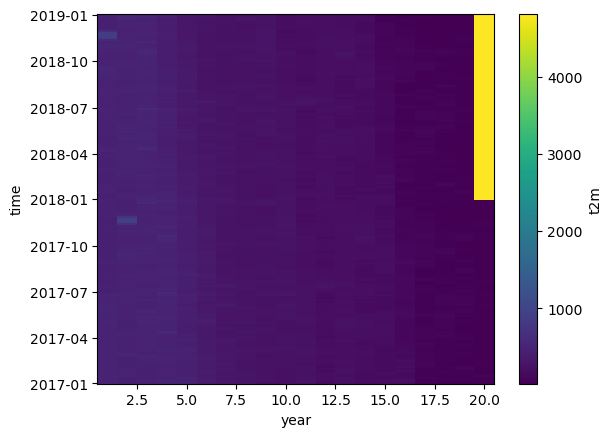

In [10]:
obs.isnull().sum(('station_id','step')).plot()
# there are many missing values, amount of missing values decreases with time

In [11]:
df_obs = obs.to_dataframe('t2m').reset_index()
df_obs = df_obs.dropna(axis = 0)
df_obs = df_obs.rename(columns = {'t2m':'obs'})

In [12]:
df_obs

,station_id,time,year,step,altitude,land_usage,latitude,longitude,station_name,obs
126,6472,2017-01-02,7,0 days 00:00:00,295.3,12,50.193663,5.255236,Humain,282.83
127,6472,2017-01-02,7,0 days 06:00:00,295.3,12,50.193663,5.255236,Humain,281.35
128,6472,2017-01-02,7,0 days 12:00:00,295.3,12,50.193663,5.255236,Humain,285.29
129,6472,2017-01-02,7,0 days 18:00:00,295.3,12,50.193663,5.255236,Humain,282.36
130,6472,2017-01-02,7,1 days 00:00:00,295.3,12,50.193663,5.255236,Humain,279.93
...,...,...,...,...,...,...,...,...,...,...
20101594,5906,2018-12-31,19,4 days 00:00:00,98.0,12,49.506200,8.558500,Mannheim,273.35
20101595,5906,2018-12-31,19,4 days 06:00:00,98.0,12,49.506200,8.558500,Mannheim,274.85
20101596,5906,2018-12-31,19,4 days 12:00:00,98.0,12,49.506200,8.558500,Mannheim,275.95
20101597,5906,2018-12-31,19,4 days 18:00:00,98.0,12,49.506200,8.558500,Mannheim,276.05


In [13]:
# takes a few minutes
df_train = pd.merge(df_obs, df_fcs,on= ['time','year','step','station_id', 'station_name'], how = 'outer')

In [14]:
df_train[0:100]

,station_id,time,year,step,altitude,land_usage,latitude,longitude,station_name,obs,number,model_altitude,model_land_usage,model_latitude,model_longitude,station_altitude,station_land_usage,station_latitude,station_longitude,t2m
0,6472,2017-01-02,7,0 days 00:00:00,295.3,12.0,50.193663,5.255236,Humain,282.83,0,301.532471,23,50.25,5.25,295.3,12,50.193663,5.255236,282.762573
1,6472,2017-01-02,7,0 days 00:00:00,295.3,12.0,50.193663,5.255236,Humain,282.83,1,301.532471,23,50.25,5.25,295.3,12,50.193663,5.255236,282.738037
2,6472,2017-01-02,7,0 days 00:00:00,295.3,12.0,50.193663,5.255236,Humain,282.83,2,301.532471,23,50.25,5.25,295.3,12,50.193663,5.255236,282.785126
3,6472,2017-01-02,7,0 days 00:00:00,295.3,12.0,50.193663,5.255236,Humain,282.83,3,301.532471,23,50.25,5.25,295.3,12,50.193663,5.255236,282.265961
4,6472,2017-01-02,7,0 days 00:00:00,295.3,12.0,50.193663,5.255236,Humain,282.83,4,301.532471,23,50.25,5.25,295.3,12,50.193663,5.255236,283.256958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,6472,2017-01-02,8,0 days 00:00:00,295.3,12.0,50.193663,5.255236,Humain,271.95,7,301.532471,23,50.25,5.25,295.3,12,50.193663,5.255236,271.648193
96,6472,2017-01-02,8,0 days 00:00:00,295.3,12.0,50.193663,5.255236,Humain,271.95,8,301.532471,23,50.25,5.25,295.3,12,50.193663,5.255236,271.780029
97,6472,2017-01-02,8,0 days 00:00:00,295.3,12.0,50.193663,5.255236,Humain,271.95,9,301.532471,23,50.25,5.25,295.3,12,50.193663,5.255236,271.403381
98,6472,2017-01-02,8,0 days 00:00:00,295.3,12.0,50.193663,5.255236,Humain,271.95,10,301.532471,23,50.25,5.25,295.3,12,50.193663,5.255236,272.023865


In [15]:
# takes a few minutes
df_train.to_feather(f'{data_path}/ESSD_benchmark_feather/ESSD_benchmark_training_data.feather')